In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv('train.csv')

# Kaggle competition

# Jane Street Market Prediction

Create a model, which must choose whether to accept or reject trade with a number of potential trading opportunities. Build a model using the historical data.

The dataset contains an anonymized set of features, feature_{0...129}, representing real stock market data. Each row in the dataset represents a trading opportunity, for which we predict an action value: 1 to make the trade and 0 to pass on it. Each trade has an associated weight and resp, which together represents a return on the trade. The date column is an integer which represents the day of the trade, while ts_id represents a time ordering. In addition to anonymized feature values, it is provided metadata about the features in features.csv.

In the training set, train.csv, weт are provided a resp value, as well as several other resp_{1,2,3,4} values that represent returns over different time horizons. These variables are not included in the test set. Trades with weight = 0 were intentionally included in the dataset for completeness, although such trades will not contribute towards the scoring evaluation.
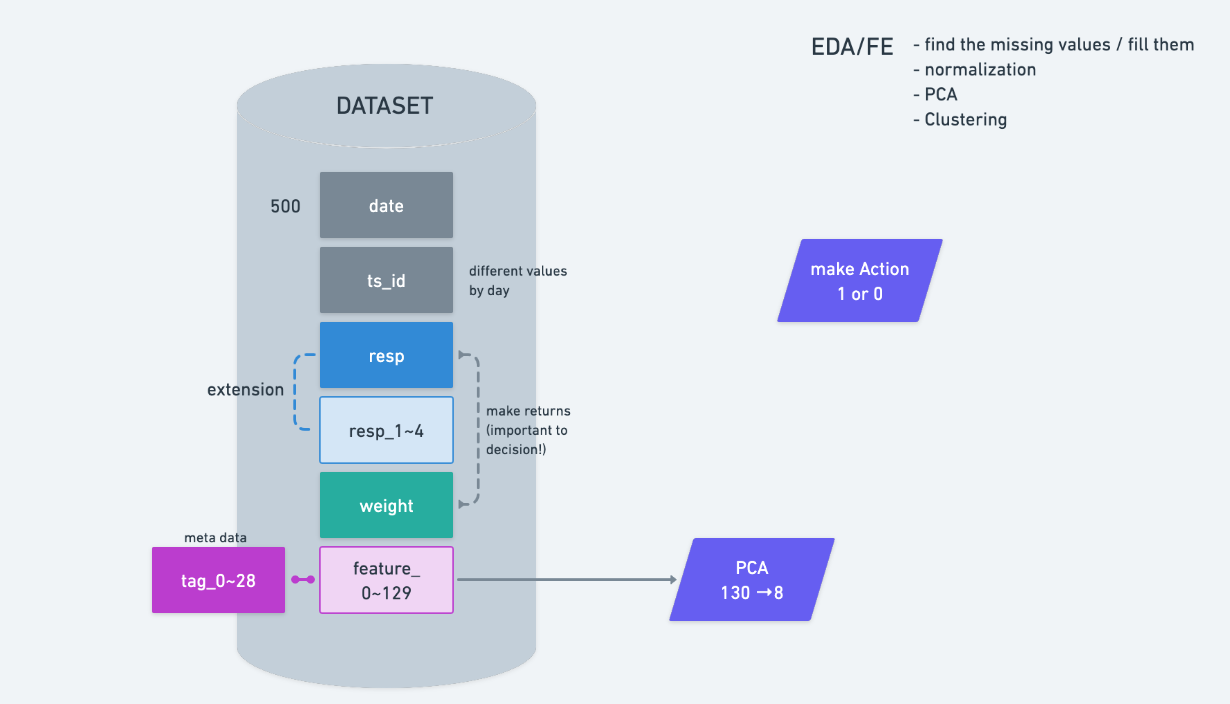

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


The size of data is 2.5Gb. Reduce the size of the data. Convert float64 to float 32

Change float64 columns to float32 if there is a really few amount of data (a very conservative threshold of 0.1%) between -.0001:.0001 to avoid hurting accuracy of small values columns

In [5]:
for i in df:
    if df[i].dtype == np.float64:
        if (((df[i] < .0001) & (df[i] > -.0001)).mean()) < .001:
            df[i] = df[i].astype(np.float32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float32(129), float64(6), int64(3)
memory usage: 1.3 GB


In [6]:
features = df.drop(columns=["date", "weight", "resp_1", "resp_2", "resp_3", "resp_4", "resp", "ts_id"])

In [8]:
features.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
0,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,-0.989982,...,NaN,NaN,1.168391,8.313582,1.782433,14.018213,2.653056,12.600291,2.301488,11.445807
1,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,-0.151877,...,NaN,NaN,-1.178850,1.777472,-0.915459,2.831612,-1.417010,2.297459,-1.304614,1.898684
2,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,5.448261,...,NaN,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299
3,-1,1.174379,0.344640,0.066872,0.009357,-1.006373,-0.676458,NaN,NaN,4.508206,...,NaN,NaN,2.838853,0.499251,3.033731,1.513488,4.397532,1.266037,3.856384,1.013469
4,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,NaN,NaN,2.683017,...,NaN,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633


In [9]:
features.isna().sum()>0

feature_0      False
feature_1      False
feature_2      False
feature_3       True
feature_4       True
               ...  
feature_125     True
feature_126     True
feature_127     True
feature_128     True
feature_129     True
Length: 130, dtype: bool

Finding out the features with missing values more than 10

In [7]:
null_features = features.isnull().sum()
null_list = list(null_features[null_features >(0.10 * len(features))].index)
null_list

['feature_7',
 'feature_8',
 'feature_17',
 'feature_18',
 'feature_27',
 'feature_28',
 'feature_72',
 'feature_78',
 'feature_84',
 'feature_90',
 'feature_96',
 'feature_102',
 'feature_108',
 'feature_114']

Lets have a look at the relationship between these features and resp, weight values.
We can drop features with more than 10% null values since there is no correlation with any of these features and resps and weight.

In [15]:
df[['resp','resp_1','resp_2','resp_3','resp_4','weight']+null_list].corr().style.background_gradient(cmap='coolwarm')

,resp,resp_1,resp_2,resp_3,resp_4,weight,feature_7,feature_8,feature_17,feature_18,feature_27,feature_28,feature_72,feature_78,feature_84,feature_90,feature_96,feature_102,feature_108,feature_114
resp,1.000000,0.452159,0.595274,0.815972,0.956197,-0.006948,0.021207,0.014660,-0.028277,-0.017448,0.048293,0.032502,-0.002034,0.000072,0.011500,0.003604,0.013469,0.004613,0.013209,0.004385
resp_1,0.452159,1.000000,0.890214,0.678381,0.358949,-0.016091,0.033919,0.026142,0.004333,0.006632,0.036125,0.025671,-0.000889,0.001371,0.008330,0.001973,0.010467,0.002994,0.010255,0.002969
resp_2,0.595274,0.890214,1.000000,0.823383,0.469230,-0.012955,0.030800,0.025124,-0.005811,0.000202,0.039829,0.028633,-0.000642,0.001266,0.008487,0.001454,0.010247,0.002223,0.010270,0.002225
resp_3,0.815972,0.678381,0.823383,1.000000,0.805952,-0.009229,0.019317,0.014859,-0.002078,0.000566,0.023373,0.016951,-0.004490,-0.003221,0.007704,0.000655,0.011542,0.003766,0.010231,0.002438
resp_4,0.956197,0.358949,0.469230,0.805952,1.000000,-0.005817,0.015059,0.009246,-0.018851,-0.012306,0.033533,0.022307,-0.003965,-0.002240,0.009916,0.003087,0.012989,0.005355,0.011978,0.004442
weight,-0.006948,-0.016091,-0.012955,-0.009229,-0.005817,1.000000,-0.016164,-0.000819,-0.011541,-0.002568,-0.010643,0.001118,0.002058,0.000367,-0.041597,0.052486,-0.044057,0.056261,-0.046157,0.053893
feature_7,0.021207,0.033919,0.030800,0.019317,0.015059,-0.016164,1.000000,0.898832,0.402987,0.374951,0.487964,0.430844,-0.009719,-0.006903,-0.015400,-0.054359,-0.009083,-0.051083,-0.001724,-0.046770
feature_8,0.014660,0.026142,0.025124,0.014859,0.009246,-0.000819,0.898832,1.000000,0.373778,0.425576,0.424587,0.463257,-0.003916,0.001188,-0.002604,-0.038638,0.000781,-0.039802,0.010609,-0.034254
feature_17,-0.028277,0.004333,-0.005811,-0.002078,-0.018851,-0.011541,0.402987,0.373778,1.000000,0.906956,-0.501928,-0.464884,-0.070201,-0.069432,-0.021351,-0.053571,0.039123,0.007819,0.016894,-0.020790
feature_18,-0.017448,0.006632,0.000202,0.000566,-0.012306,-0.002568,0.374951,0.425576,0.906956,1.000000,-0.446295,-0.503707,-0.078615,-0.074634,-0.021682,-0.054821,0.040938,0.006212,0.017579,-0.023075


In [8]:
features.drop(columns=null_list,inplace=True)

More na values just fill in with mean value in the approptiate column.

In [9]:
features.fillna(features.mean(axis=0),inplace=True)

In [10]:
features.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_9,feature_10,feature_11,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
0,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,-0.989982,-1.055090,0.089122,...,0.335127,0.268776,1.168391,8.313582,1.782433,14.018213,2.653056,12.600291,2.301488,11.445807
1,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,-0.151877,-0.384952,0.089122,...,0.335127,0.268776,-1.178850,1.777472,-0.915459,2.831612,-1.417010,2.297459,-1.304614,1.898684
2,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,5.448261,2.668029,0.089122,...,0.335127,0.268776,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299
3,-1,1.174379,0.344640,0.066872,0.009357,-1.006373,-0.676458,4.508206,2.484260,0.089122,...,0.335127,0.268776,2.838853,0.499251,3.033731,1.513488,4.397532,1.266037,3.856384,1.013469
4,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,2.683017,1.450991,0.089122,...,0.335127,0.268776,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633


Clustering

In [13]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [15]:
features_columns = features.columns
corr = features.corr()
corr_np = corr.to_numpy()

corr_np

array([[ 1.00000000e+00,  2.28599733e-02,  1.73856833e-02, ...,
         1.41133792e-04,  1.52546344e-02,  5.68947543e-04],
       [ 2.28599733e-02,  1.00000000e+00,  8.61774350e-01, ...,
        -2.98042872e-02,  4.38145391e-01, -2.51700362e-02],
       [ 1.73856833e-02,  8.61774350e-01,  1.00000000e+00, ...,
         6.66373459e-02,  2.00337202e-01,  7.14167629e-02],
       ...,
       [ 1.41133792e-04, -2.98042872e-02,  6.66373459e-02, ...,
         1.00000000e+00,  2.37526260e-01,  9.24650646e-01],
       [ 1.52546344e-02,  4.38145391e-01,  2.00337202e-01, ...,
         2.37526260e-01,  1.00000000e+00,  2.78016944e-01],
       [ 5.68947543e-04, -2.51700362e-02,  7.14167629e-02, ...,
         9.24650646e-01,  2.78016944e-01,  1.00000000e+00]])

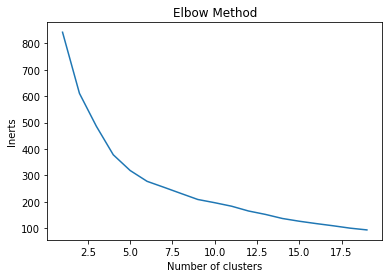

In [16]:
inerts = []
max_clusters = 20
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(corr_np)
    inerts.append(kmeans.inertia_)
    
plt.plot(range(1, max_clusters), inerts)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inerts')
plt.show()

In [17]:
n_clust = 5
kmeans = KMeans(n_clusters = n_clust, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
corr_labels = kmeans.fit_predict(corr_np)

In [18]:
corr_df = pd.DataFrame(np.c_[features_columns, corr_labels])
corr_df.columns = ["feature", "cluster"]
corr_df['feat_list'] = corr_df.groupby(["cluster"]).transform(lambda x: ', '.join(x))
corr_df = corr_df.groupby(["cluster", "feat_list"]).size().reset_index(name = 'feat_count')
corr_df

,cluster,feat_list,feat_count
0,0,"feature_1, feature_2, feature_9, feature_10, f...",24
1,1,"feature_29, feature_30, feature_31, feature_32...",22
2,2,"feature_3, feature_4, feature_5, feature_6, fe...",33
3,3,"feature_0, feature_19, feature_20, feature_21,...",15
4,4,"feature_44, feature_45, feature_86, feature_87...",22


In [19]:
PCA

sklearn.decomposition._pca.PCA

In [20]:
from sklearn.decomposition import PCA
pca =  PCA(8).fit(features)

In [21]:
pca.transform(features)

array([[  3.91936697,   2.05008111,  -5.35627985, ..., -13.44577101,
         11.40111376,   7.64529768],
       [ -3.36607646,  -3.51521417,  -4.52248164, ...,  -3.49810108,
          9.2064763 ,  -0.20649511],
       [  1.39054295,  -4.04260593,   7.39254616, ..., -12.37966603,
          5.87379651,   6.77906764],
       ...,
       [ -3.56671845,   4.13190587,  -2.88878017, ...,   5.21814225,
         -5.96571789,  -4.57572207],
       [ -4.82705191,  -0.16649639,   0.30136839, ...,  -1.43867581,
          0.44209621,   2.08708316],
       [ 38.6698352 , -12.08962882,   4.92848656, ...,   5.52259891,
          3.21483403,  -5.56330515]])

In [22]:
df_pca_features = pd.DataFrame(pca.transform(features))

In [23]:
df_pca_features.columns = ['pc'+str(i+1) for i in range(8)]
df_pca_features.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,3.919367,2.050081,-5.356280,-1.778867,11.474442,-13.445771,11.401114,7.645298
1,-3.366076,-3.515214,-4.522482,-3.608852,5.965105,-3.498101,9.206476,-0.206495
2,1.390543,-4.042606,7.392546,-13.442833,9.872046,-12.379666,5.873797,6.779068
3,0.588094,-9.675891,7.397721,-12.397750,4.613623,-5.492382,0.380129,2.447904
4,-2.278642,2.048083,-5.528969,-2.650143,7.692919,-7.876234,5.243536,3.283163


In [24]:
df_pca_features['action'] = df.ts_id.values
df_pca_features['weight'] = df.weight.values
df_pca_features['resp'] = df.resp.values
df_pca_features.corr().style.background_gradient(cmap='coolwarm')

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,action,weight,resp
pc1,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.081274,-0.005701,0.008443
pc2,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.001348,-0.011556,-0.019585
pc3,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.034978,-0.040660,0.019491
pc4,-0.000000,0.000000,-0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.038908,0.090031,-0.005840
pc5,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,-0.000000,0.050955,-0.038526,0.000231
pc6,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.011565,0.124907,-0.004244
pc7,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,1.000000,-0.000000,-0.004889,0.279029,-0.017698
pc8,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.044491,-0.153780,0.007588
action,-0.081274,-0.001348,-0.034978,-0.038908,0.050955,0.011565,-0.004889,-0.044491,1.000000,0.034532,-0.007526
weight,-0.005701,-0.011556,-0.040660,0.090031,-0.038526,0.124907,0.279029,-0.153780,0.034532,1.000000,-0.006948
